# Summary :

- Provided dataset is the twitter data for the USA airlines.

- This data has so much inforamtion about the users their feedback and imotions and customer experience they have in  conversations on social media platforms.

- This data  become a key strategy in social media marketing ,feedback and customer experience for the airlines .

- Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.


- This data is scaped from feb-2015 for all US major airlines .




# Problem Stament : 

- As Datascientist  we have to undertand simplyfy the data ,preprocess the data .

- Find  the insights from prepocess data towards Major airlines ,compair the data  between them and orivide analysis on the data.

- Do the sentiment analysis on the data to find the user experience as  positive, negative, and neutral tweets, 
- Also categorizing negative reasons (such as "late flight" or "rude service" if any.


- Find the insights from data that will help Airlines to make  customers experience better and improve any service based on analysis  which will help  to grow the business .

 



# Dataset:

  The dataset has the following columns:


- tweet_id                                                           
- airline_sentiment                                               
- airline_sentiment_confidence                               
- negativereason                                                   
- negativereason_confidence                                    
- airline                                                                    
- airline_sentiment_gold                                              
- name     
- negativereason_gold 
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location 
- user_timezone

In [1]:
#changing the default directory
import os as os
dir="E:\\GREAT_LEARNING\\NLP"
os.chdir(dir)
os.getcwd()

'E:\\GREAT_LEARNING\\NLP'

In [2511]:
#importing the all the necessory packges 
import re
import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk                                         #Natural language processing tool-kit

nltk.download('stopwords')    #download stopwords
nltk.download('punkt')

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer,snowball                 # Stemmer
from nltk.tokenize import word_tokenize 

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

!pip install vaderSentiment    # Install vader sentiment package
!pip install textblob   # Install textblob package

# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt   
from sklearn.model_selection import KFold , StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier       # Import Random forest Classifier
from sklearn.metrics import classification_report         # Import Classification report
from sklearn.model_selection import cross_val_score 



[nltk_data] Downloading package stopwords to C:\Users\Sandesh
[nltk_data]     T\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Sandesh
[nltk_data]     T\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


In [2512]:
# Loading data into pandas dataframe
data = pd.read_csv("Tweets.csv")

In [2513]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2514]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [2515]:
data[(data.duplicated()==True) &(data.airline_sentiment=="negative") ]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12040,570308309682675712,negative,1.0,Customer Service Issue,1.0,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I even consider continu...,NaN,2015-02-24 11:44:31 -0800,NaN,Quito
12068,570301395141836801,negative,1.0,Late Flight,1.0,American,NaN,JoBarredaV,NaN,1,@AmericanAir r u serious?? 304min #delay with ...,NaN,2015-02-24 11:17:02 -0800,Mexico City,Central Time (US & Canada)
12069,570300915418320897,negative,1.0,Cancelled Flight,1.0,American,NaN,LancasterPattie,NaN,0,@AmericanAir You are jumping the gun and Cance...,NaN,2015-02-24 11:15:08 -0800,NaN,NaN
12075,570298770136674304,negative,1.0,Customer Service Issue,1.0,American,NaN,law_econ,NaN,0,@AmericanAir This doesn't address my issue. I ...,NaN,2015-02-24 11:06:37 -0800,"Newport Beach, CA",Central Time (US & Canada)
12078,570298644475346945,negative,1.0,Customer Service Issue,1.0,American,NaN,denismishin,NaN,0,@AmericanAir submitted a case to AA customer r...,NaN,2015-02-24 11:06:07 -0800,"Bellevue, WA",Eastern Time (US & Canada)
12079,570298371140939776,negative,1.0,Late Flight,1.0,American,NaN,djjohnpayne,NaN,0,@AmericanAir if by near the gate you mean sitt...,"[0.0, 0.0]",2015-02-24 11:05:01 -0800,"Las Vegas, NV",Pacific Time (US & Canada)
12086,570296996445204480,negative,1.0,Late Flight,1.0,American,NaN,aaronmsantos,NaN,0,@AmericanAir that's 16+ extra hours of travel ...,NaN,2015-02-24 10:59:34 -0800,"Brooklyn, NY and all over.",Quito
12093,570295576446808065,negative,1.0,Customer Service Issue,1.0,American,NaN,HollyKinnamon,NaN,0,@AmericanAir I have been on hold w/customer se...,NaN,2015-02-24 10:53:55 -0800,"Washington, DC",Quito
12105,570289085354541058,negative,1.0,Lost Luggage,1.0,American,NaN,brownsrock,NaN,0,@AmericanAir - Please find my bag!! In Singapo...,NaN,2015-02-24 10:28:08 -0800,"Bangkok, Thailand",Bangkok
12106,570288809532891137,negative,1.0,Customer Service Issue,1.0,American,NaN,jkordyback,NaN,0,@AmericanAir “Inconvenient” is such a convenie...,NaN,2015-02-24 10:27:02 -0800,"North Saanich, BC",Pacific Time (US & Canada)


In [2516]:
print(data.isna().sum())
(data.isna().sum()/len(data)*100).sort_values(ascending=False)

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


negativereason_gold             99.781421
airline_sentiment_gold          99.726776
tweet_coord                     93.039617
negativereason                  37.308743
user_timezone                   32.923497
tweet_location                  32.329235
negativereason_confidence       28.128415
tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
airline                          0.000000
name                             0.000000
retweet_count                    0.000000
text                             0.000000
tweet_created                    0.000000
dtype: float64

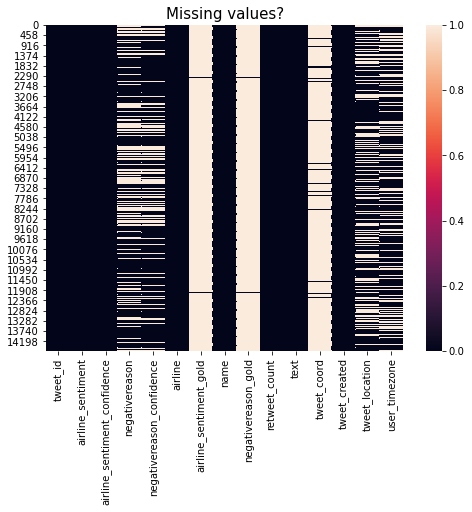

In [2517]:
plt.figure(figsize=(8,6))
sns.heatmap(data.isnull())                                  #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()

<AxesSubplot:>

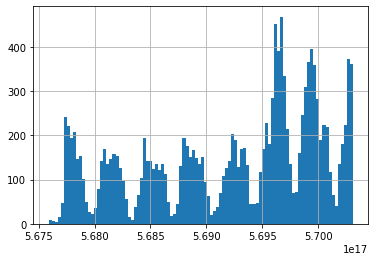

In [2518]:
data.tweet_id.hist(bins=100)

In [2519]:
#Dropping the columns as  
'''negativereason_gold             99.781421
airline_sentiment_gold          99.726776
tweet_coord                     93.0396
tweet_id'''
#backupdata
data_bkp=data
data.drop(columns=["negativereason_gold","airline_sentiment_gold","tweet_coord","tweet_id"],axis=1,inplace=True)

In [2520]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14640 non-null  object 
 1   airline_sentiment_confidence  14640 non-null  float64
 2   negativereason                9178 non-null   object 
 3   negativereason_confidence     10522 non-null  float64
 4   airline                       14640 non-null  object 
 5   name                          14640 non-null  object 
 6   retweet_count                 14640 non-null  int64  
 7   text                          14640 non-null  object 
 8   tweet_created                 14640 non-null  object 
 9   tweet_location                9907 non-null   object 
 10  user_timezone                 9820 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 1.2+ MB


In [2521]:
#Trating the missing data

data.tweet_location[data.tweet_location.isna()==False].value_counts()
     

Boston, MA               157
New York, NY             156
Washington, DC           150
New York                 127
USA                      126
                        ... 
Columbus, Ohio, USA        1
Eatontown, NJ              1
Where there is love..      1
fort worth, tx             1
Here                       1
Name: tweet_location, Length: 3081, dtype: int64

In [2522]:

from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy="most_frequent")

data[["negativereason","tweet_location","user_timezone"]]=imp.fit_transform(data[["negativereason","tweet_location","user_timezone"]])



0.6706


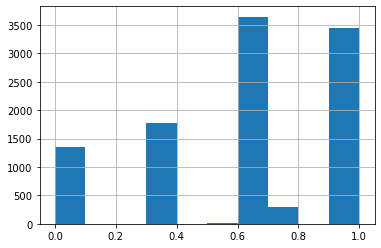

In [2523]:
data.negativereason_confidence.hist( bins=10)       
print(data.negativereason_confidence.median())
data.negativereason_confidence.fillna(data.negativereason_confidence.median(),inplace=True)

<AxesSubplot:>

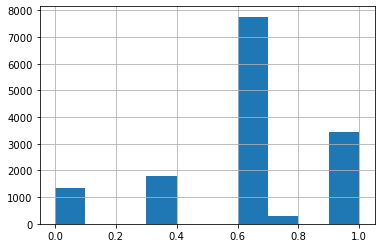

In [2524]:
data.negativereason_confidence.hist( bins=10)   

In [2525]:
data.isna().sum()

airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
name                            0
retweet_count                   0
text                            0
tweet_created                   0
tweet_location                  0
user_timezone                   0
dtype: int64

In [2526]:
#extracting tge date from the  time line 
data["Date"]=pd.DatetimeIndex(data.tweet_created)
data["Year"]=pd.DatetimeIndex(data.Date).year
data["Month"]=pd.DatetimeIndex(data.Date).month
data["Day"]=pd.DatetimeIndex(data.Date).day
data["Hour"]=pd.DatetimeIndex(data.Date).hour
data["Minute"]=pd.DatetimeIndex(data.Date).minute


In [2527]:
data.tail(10)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,Date,Year,Month,Day,Hour,Minute
14630,positive,1.0000,Customer Service Issue,0.6706,American,Laurelinesblog,0,@AmericanAir Thanks! He is.,2015-02-22 12:04:09 -0800,"Chapel Hill, NC",Eastern Time (US & Canada),2015-02-22 12:04:09-08:00,2015,2,22,12,4
14631,negative,1.0000,Bad Flight,1.0000,American,MDDavis7,0,@AmericanAir thx for nothing on getting us out...,2015-02-22 12:04:07 -0800,US,Eastern Time (US & Canada),2015-02-22 12:04:07-08:00,2015,2,22,12,4
14632,neutral,0.6760,Customer Service Issue,0.0000,American,Chad_SMFYM,0,"“@AmericanAir: @TilleyMonsta George, that does...",2015-02-22 12:01:31 -0800,"Boston, MA",Central Time (US & Canada),2015-02-22 12:01:31-08:00,2015,2,22,12,1
14633,negative,1.0000,Cancelled Flight,1.0000,American,RussellsWriting,0,@AmericanAir my flight was Cancelled Flightled...,2015-02-22 12:01:06 -0800,Los Angeles,Arizona,2015-02-22 12:01:06-08:00,2015,2,22,12,1
14634,negative,0.6684,Late Flight,0.6684,American,GolfWithWoody,0,@AmericanAir right on cue with the delays👌,2015-02-22 12:01:02 -0800,"Boston, MA",Quito,2015-02-22 12:01:02-08:00,2015,2,22,12,1
14635,positive,0.3487,Customer Service Issue,0.0000,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2015-02-22 12:01:01 -0800,"Boston, MA",Eastern Time (US & Canada),2015-02-22 12:01:01-08:00,2015,2,22,12,1
14636,negative,1.0000,Customer Service Issue,1.0000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22 11:59:46 -0800,Texas,Eastern Time (US & Canada),2015-02-22 11:59:46-08:00,2015,2,22,11,59
14637,neutral,1.0000,Customer Service Issue,0.6706,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,2015-02-22 11:59:15 -0800,"Nigeria,lagos",Eastern Time (US & Canada),2015-02-22 11:59:15-08:00,2015,2,22,11,59
14638,negative,1.0000,Customer Service Issue,0.6659,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),2015-02-22 11:59:02-08:00,2015,2,22,11,59
14639,neutral,0.6771,Customer Service Issue,0.0000,American,daviddtwu,0,@AmericanAir we have 8 ppl so we need 2 know h...,2015-02-22 11:58:51 -0800,"dallas, TX",Eastern Time (US & Canada),2015-02-22 11:58:51-08:00,2015,2,22,11,58


In [2528]:
#as we can see that the year and Month for the tweet create coloumn is same we can delete this columns with tweet created 

#data.drop(columns=["Date","Year","Month","tweet_created"],axis=1,inplace=True)
data.airline_sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

# Observations :

-	We have   total 1460 data points and most of the columns are categorical.
-	I have checked the duplicate, unique columns and we do not have any duplicated columns as such.
-	We have multiple missing columns as below,
-	negativereason_gold             99.781421
-	airline_sentiment_gold          99.726776
-	tweet_coord                     93.039617
-	negativereason                  37.308743
-	user_timezone                   32.923497
-	tweet_location                  32.329235
-	negativereason_confidence       28.128415

-	Also tweet_id is unique number column and not providing any significance in the findings .

-	We have deleted the missing value column and converted the  Datetime files to  Day,month , year and hours .



# Exploratory Data Analysis  And Insigts from the Data

Text(0.5, 0.98, 'Characters in message')

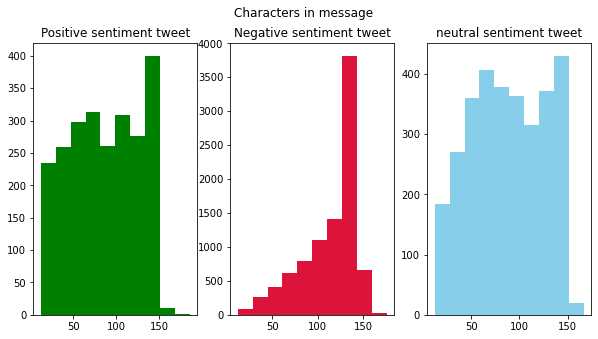

In [2529]:
#Plotting carectors   in the tweets for each sentiment
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
tweet_len = data[data['airline_sentiment']=='positive']['text'].str.len()
ax1.hist(tweet_len,color='green')
ax1.set_title('Positive sentiment tweet')
tweet_len = data[data['airline_sentiment']=='negative']['text'].str.len()
ax2.hist(tweet_len,color='crimson')
ax2.set_title('Negative sentiment tweet')
tweet_len = data[data['airline_sentiment']=='neutral']['text'].str.len()
ax3.hist(tweet_len,color='skyblue')
ax3.set_title('neutral sentiment tweet')
fig.suptitle('Characters in message')

Text(0.5, 0.98, 'Words in a tweet')

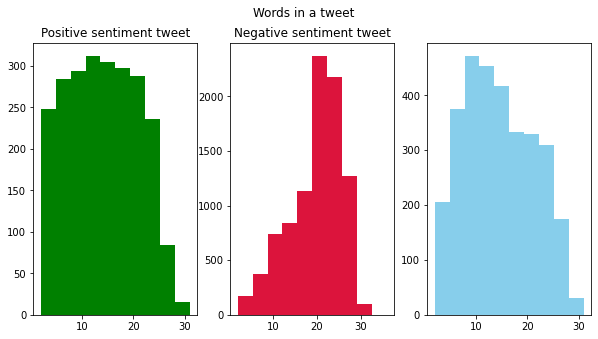

In [2530]:
#Number of words in a tweet
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
tweet_len = data[data['airline_sentiment']=='positive']['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color='green')
ax1.set_title('Positive sentiment tweet')
tweet_len = data[data['airline_sentiment']=='negative']['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='crimson')
ax2.set_title('Negative sentiment tweet')
tweet_len = data[data['airline_sentiment']=='neutral']['text'].str.split().map(lambda x: len(x))
ax3.hist(tweet_len,color='skyblue')
fig.suptitle('Words in a tweet')

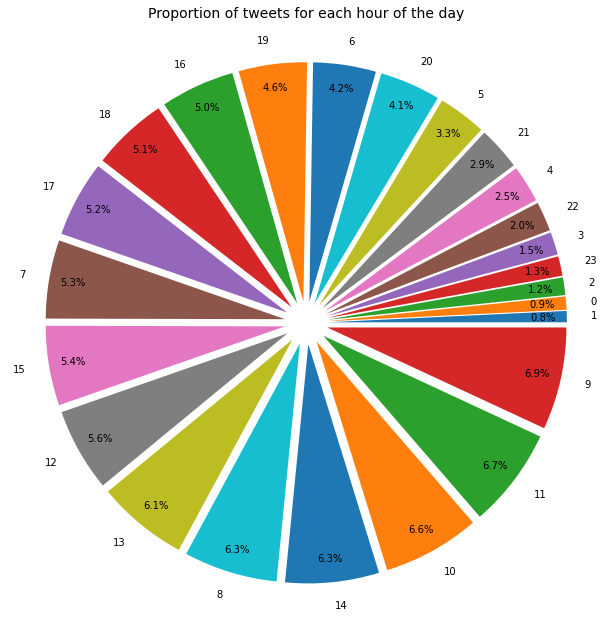

In [2531]:
#Using matplotlib
Category=data['Hour'].value_counts().sort_values()
pie, ax = plt.subplots(figsize=[20,11])
labels = Category.keys()
plt.pie(x=Category, autopct="%.1f%%", explode=[0.09]*24, labels=labels, pctdistance=0.9)
plt.title("Proportion of tweets for each hour of the day", fontsize=14);
#pie.savefig("DeliveryPieChart.png")

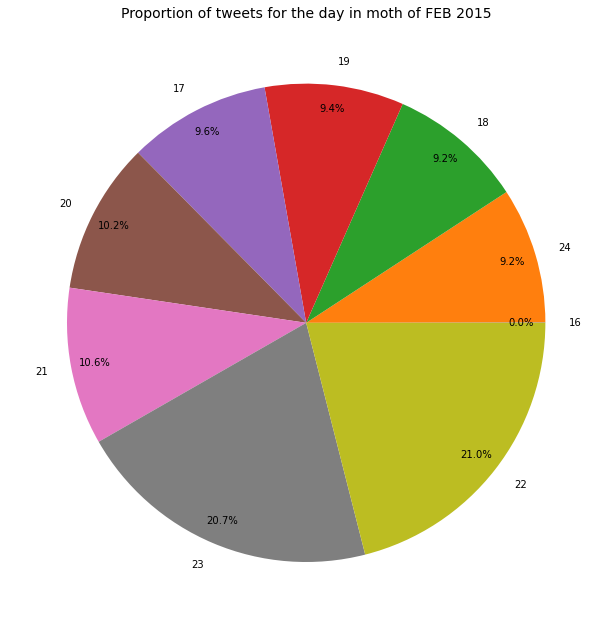

In [2532]:
#Using matplotlib
Category=data['Day'].value_counts().sort_values()
pie, ax = plt.subplots(figsize=[20,11])
labels = Category.keys()
plt.pie(x=Category, autopct="%.1f%%",  labels=labels, pctdistance=0.9)
plt.title("Proportion of tweets for the day in moth of FEB 2015", fontsize=14);
#pie.savefig("DeliveryPieChart.png")

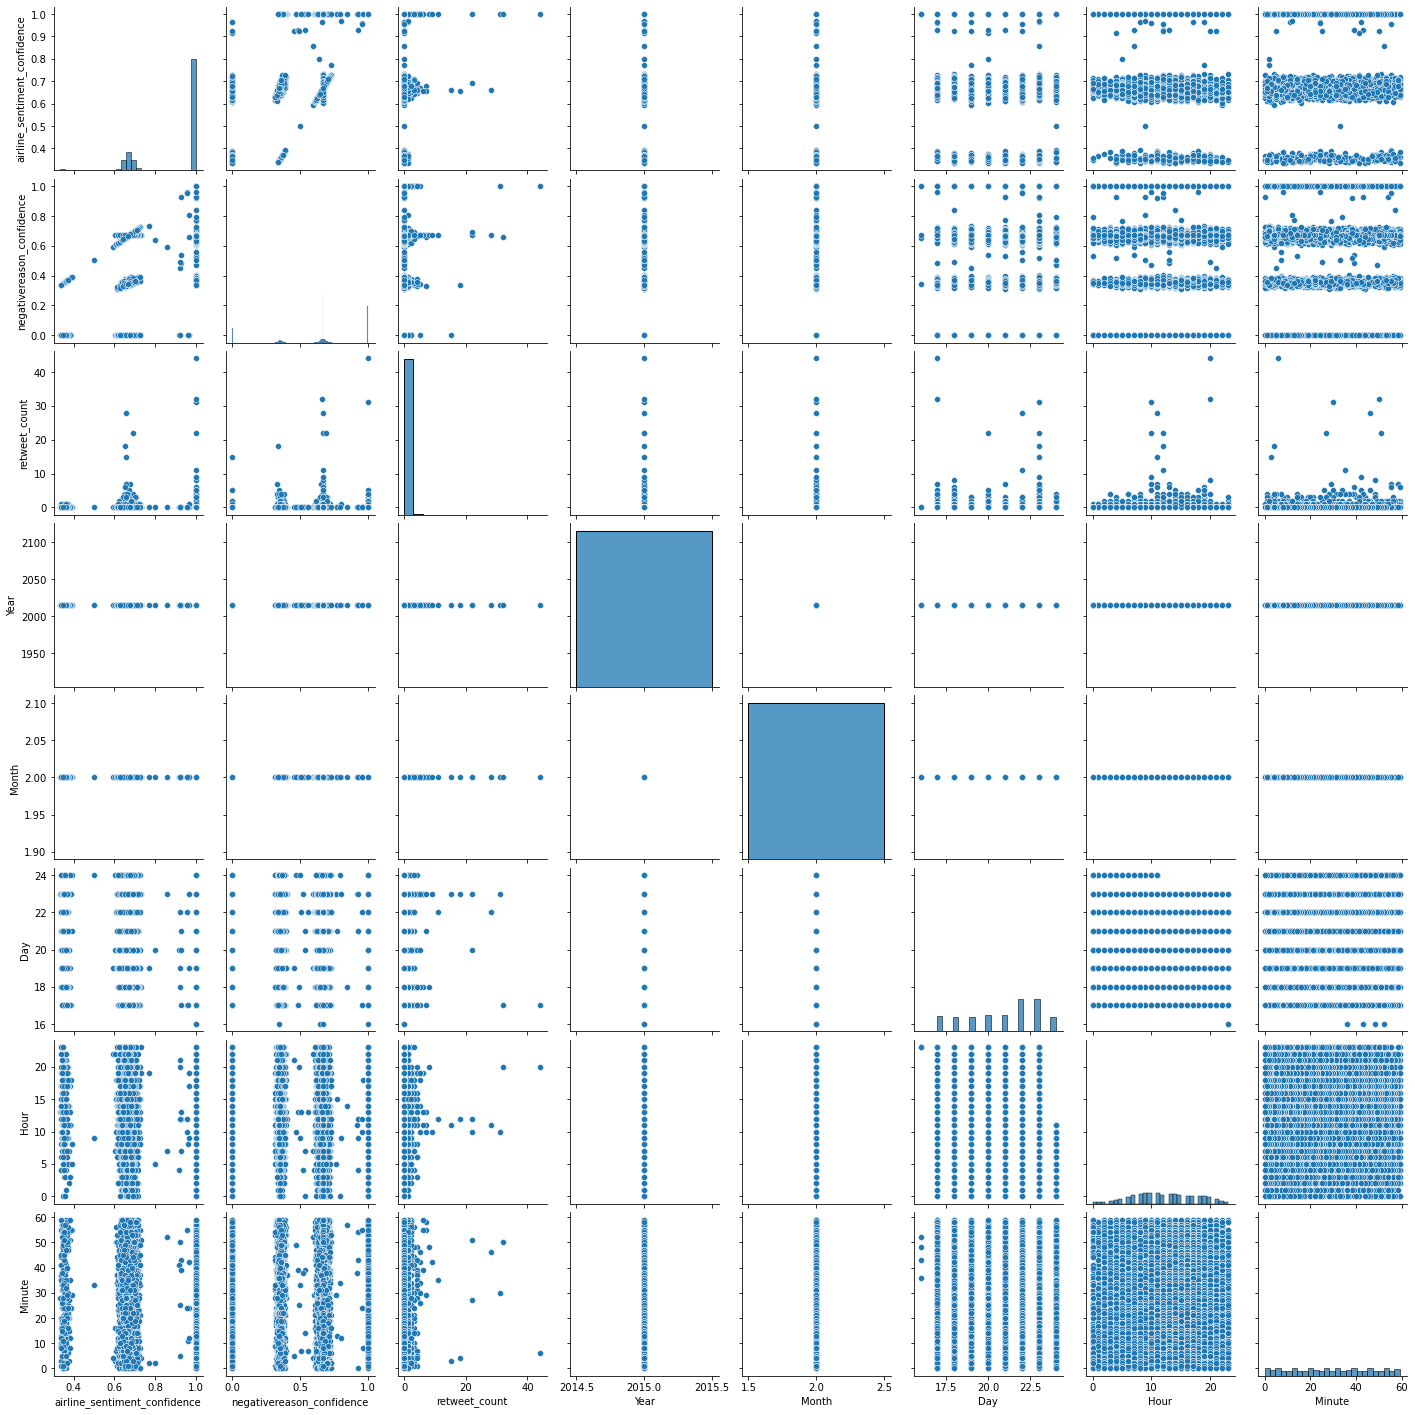

In [2533]:
sns.pairplot(data)

In [2534]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=10):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [2535]:
data.columns

Index(['airline_sentiment', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'name', 'retweet_count', 'text',
       'tweet_created', 'tweet_location', 'user_timezone', 'Date', 'Year',
       'Month', 'Day', 'Hour', 'Minute'],
      dtype='object')

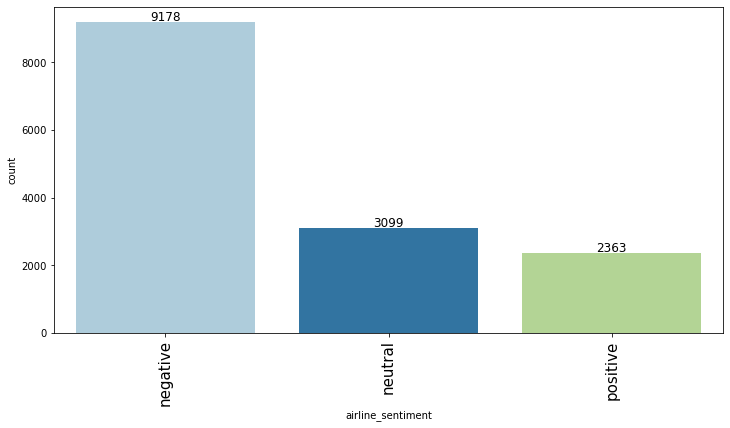

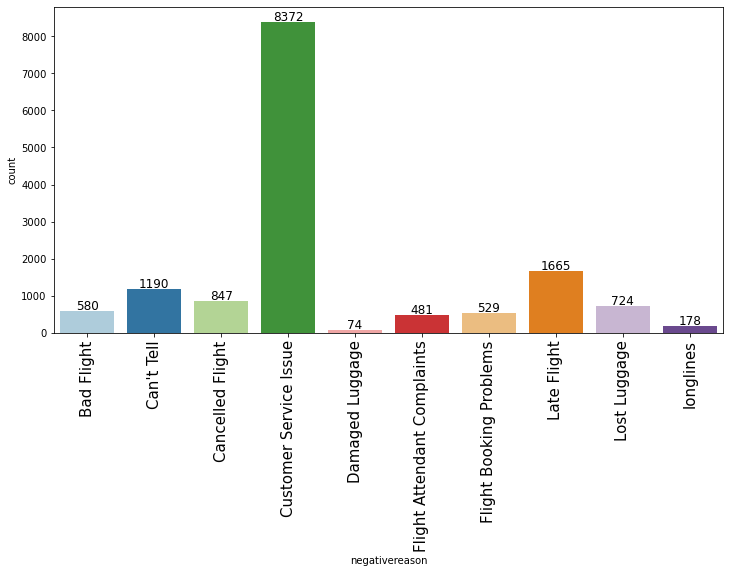

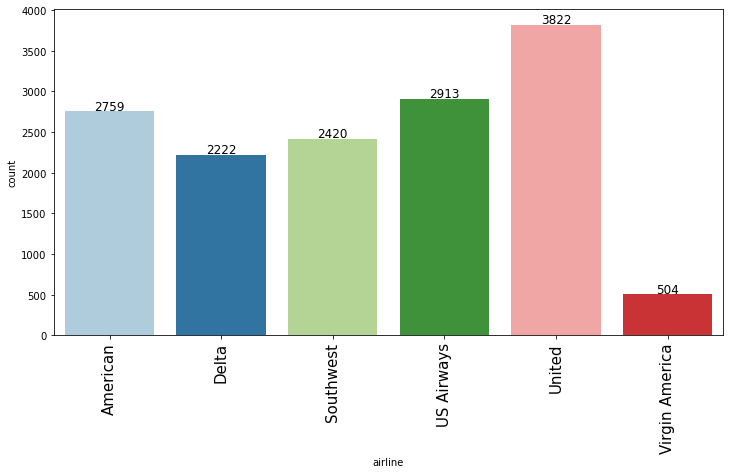

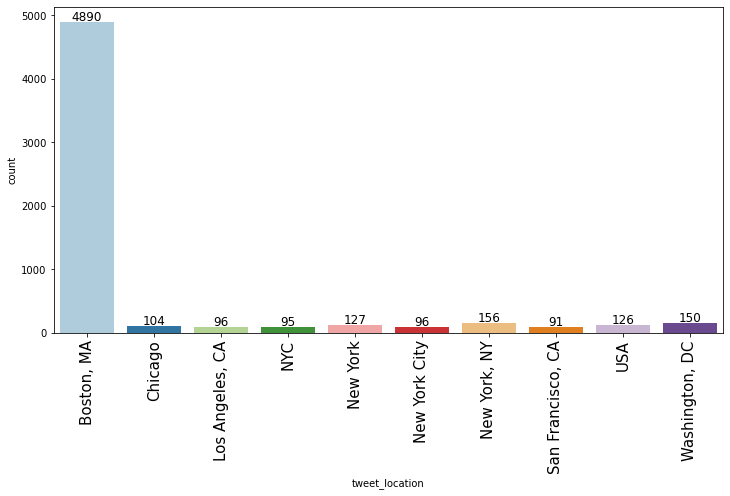

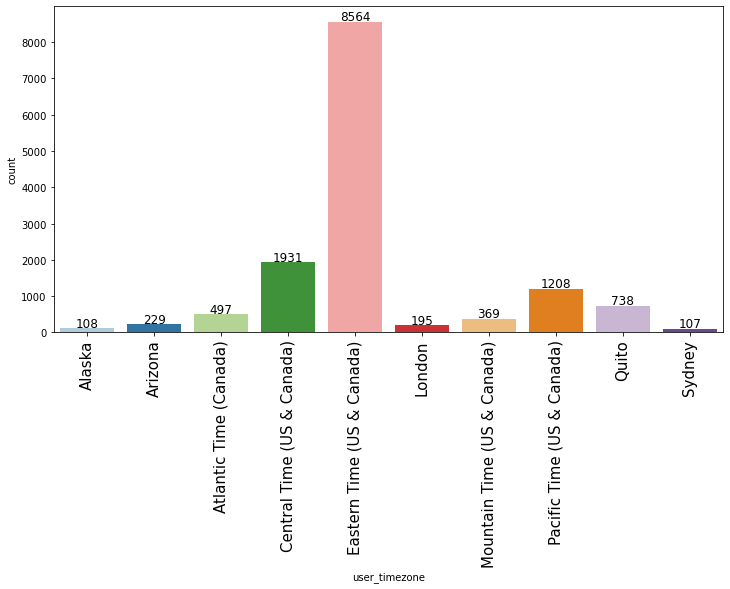

In [2536]:
cat_data=['airline_sentiment', 'negativereason','airline', 'tweet_location', 'user_timezone']
for col in cat_data:
    labeled_barplot(data,col)

E:\SoftWare\Ananconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\SoftWare\Ananconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\SoftWare\Ananconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\SoftWare\Ananconda\lib\site-

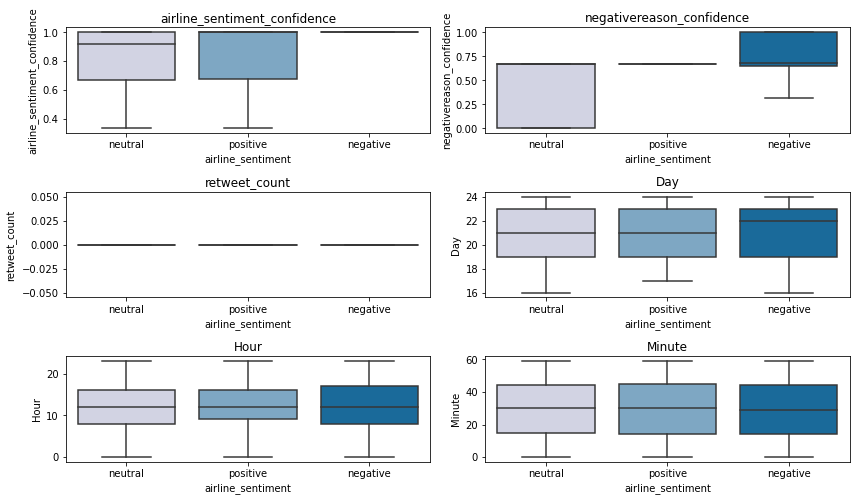

In [2537]:
cols = data[
    [
       'airline_sentiment_confidence', 
       'negativereason_confidence', 'retweet_count',
        'Day', 'Hour', 'Minute'
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["airline_sentiment"], data[variable], palette="PuBu", showfliers=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [2538]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

airline            American  Delta  Southwest  US Airways  United  \
airline_sentiment                                                   
All                    2759   2222       2420        2913    3822   
negative               1960    955       1186        2263    2633   
neutral                 463    723        664         381     697   
positive                336    544        570         269     492   

airline            Virgin America    All  
airline_sentiment                         
All                           504  14640  
negative                      181   9178  
neutral                       171   3099  
positive                      152   2363  
------------------------------------------------------------------------------------------------------------------------


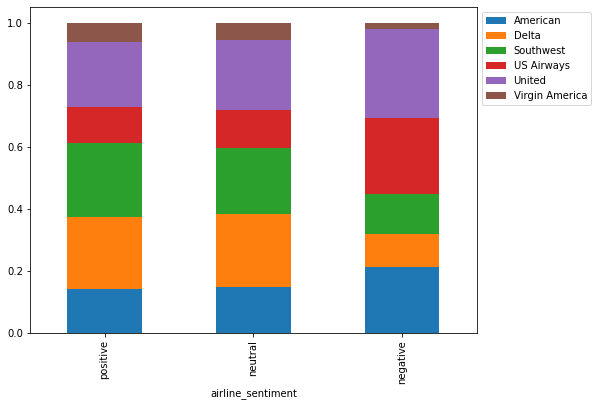

In [2539]:

['airline_sentiment', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'name', 'retweet_count', 'text',
       'tweet_location', 'user_timezone', 'Day', 'Hour', 'Minute'],
stacked_barplot(data, "airline_sentiment", "airline")

In [2540]:
['airline_sentiment', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'name', 'retweet_count', 'text',
       'tweet_location', 'user_timezone', 'Day', 'Hour', 'Minute'],
#stacked_barplot(data, "user_timezone","airline_sentiment")

(['airline_sentiment',
  'airline_sentiment_confidence',
  'negativereason',
  'negativereason_confidence',
  'airline',
  'name',
  'retweet_count',
  'text',
  'tweet_location',
  'user_timezone',
  'Day',
  'Hour',
  'Minute'],)

In [2541]:
data.drop(['airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'name', 'retweet_count', 
       'tweet_location', 'user_timezone', 'Day', 'Hour', 'Minute','tweet_created','Date','Year','Month'],inplace=True,axis=1)

In [2542]:
data.shape

(14640, 2)

In [2543]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


# Text preprocessing  and Text cleaning:

- Remove html tags.
- Replace contractions in string.
- Remove numbers.
- Tokenization.
- Remove Stopwords.
- Lemmatized data.
- We have used the NLTK library to tokenize words, remove stopwords and lemmatize the remaining words.

In [2544]:
#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

#expand the contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

#remove the numericals present in the text
def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text

def clean_text(text):
    text = strip_html(text)
    text = replace_contractions(text)
    text = remove_numbers(text)
    return text
data['text'] = data['text'].apply(lambda x: clean_text(x))
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...


In [2545]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, com..."
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Mu..."
3,negative,"[@, VirginAmerica, it, is, really, aggressive,..."
4,negative,"[@, VirginAmerica, and, it, is, a, really, big..."


In [2546]:
from nltk.corpus import stopwords 
stopwords = stopwords.words('english')
stopwords = list(set(stopwords)) 
lemmatizer = WordNetLemmatizer()

#remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# convert all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

# Remove the punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Remove the stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

# lemmatize the words
def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

#data['review'] = data['review'].astype(str)
data['text']=data.apply(lambda row: normalize(row['text']), axis=1)

In [2547]:
data['text']
data['text'] =  data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
print(data['text'].shape)

(14640,)


In [2548]:
from collections import Counter
negative_sent = data[data['airline_sentiment']=='negative']

top = Counter([item for sublist in negative_sent['text'] for item in sublist])
freq_negative = pd.DataFrame(top.most_common(20))
freq_negative.columns = ['Common_words','count']
freq_negative.style.background_gradient(cmap='Reds')

,Common_words,count
0,flight,3595
1,unite,2896
2,usairways,2374
3,americanair,2108
4,get,1521
5,southwestair,1214
6,jetblue,1052
7,cancel,920
8,delay,902
9,service,770


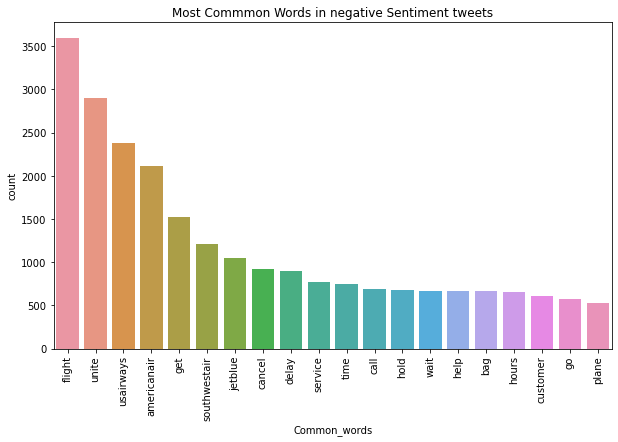

In [2549]:

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Common_words', y='count', 
            data=freq_negative, ax=ax)
plt.title("Most Commmon Words in negative Sentiment tweets")
plt.xticks(rotation='vertical');

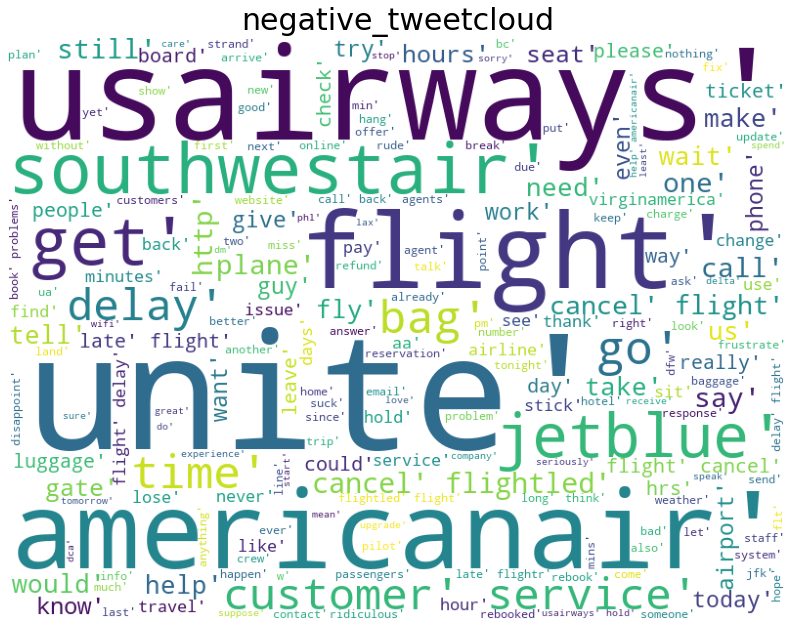

In [2550]:
import wordcloud
def show_wordcloud(negative_sent, title):
    text = ' '.join(negative_sent['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

show_wordcloud(negative_sent, "negative_tweetcloud")

In [2551]:
Positive_sent = data[data['airline_sentiment']=='positive']
#MosT common positive words
top = Counter([item for sublist in Positive_sent['text'] for item in sublist])
freq_positive = pd.DataFrame(top.most_common(20))
freq_positive.columns = ['Common_words','count']
freq_positive.style.background_gradient(cmap='Greens')


,Common_words,count
0,thank,1065
1,jetblue,595
2,southwestair,576
3,unite,528
4,flight,443
5,americanair,355
6,usairways,276
7,get,255
8,great,236
9,http,217


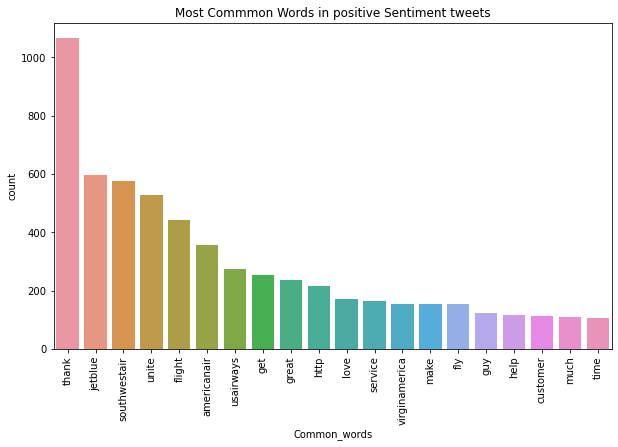

In [2552]:

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Common_words', y='count', 
            data=freq_positive, ax=ax)
plt.title("Most Commmon Words in positive Sentiment tweets")
plt.xticks(rotation='vertical');

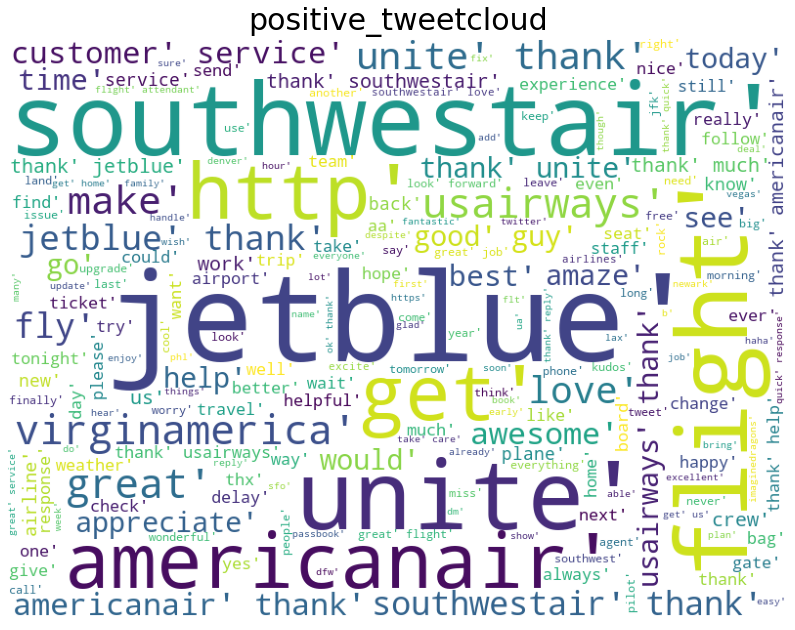

In [2553]:
import wordcloud
def show_wordcloud(Positive_sent, title):
    text = ' '.join(Positive_sent['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

show_wordcloud(Positive_sent, "positive_tweetcloud")

In [2554]:
neutral_sent = data[data['airline_sentiment']=='neutral']
#MosT common positive words
top = Counter([item for sublist in neutral_sent['text'] for item in sublist])
freq_neutral = pd.DataFrame(top.most_common(20))
freq_neutral.columns = ['Common_words','count']
freq_neutral.style.background_gradient(cmap='Blues')

,Common_words,count
0,flight,798
1,jetblue,748
2,unite,737
3,southwestair,671
4,http,501
5,americanair,499
6,usairways,401
7,get,344
8,thank,226
9,need,185


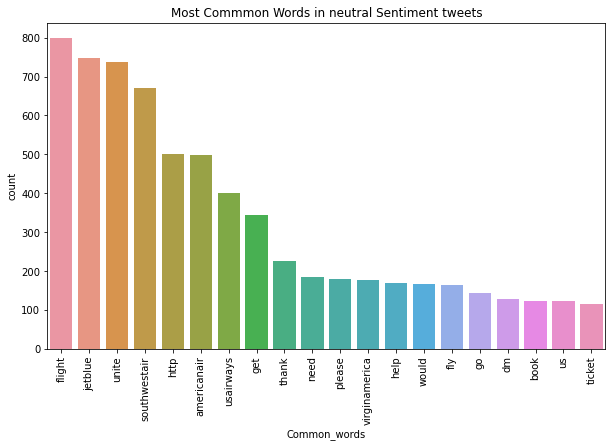

In [2555]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Common_words', y='count', 
            data=freq_neutral, ax=ax)
plt.title("Most Commmon Words in neutral Sentiment tweets")
plt.xticks(rotation='vertical');

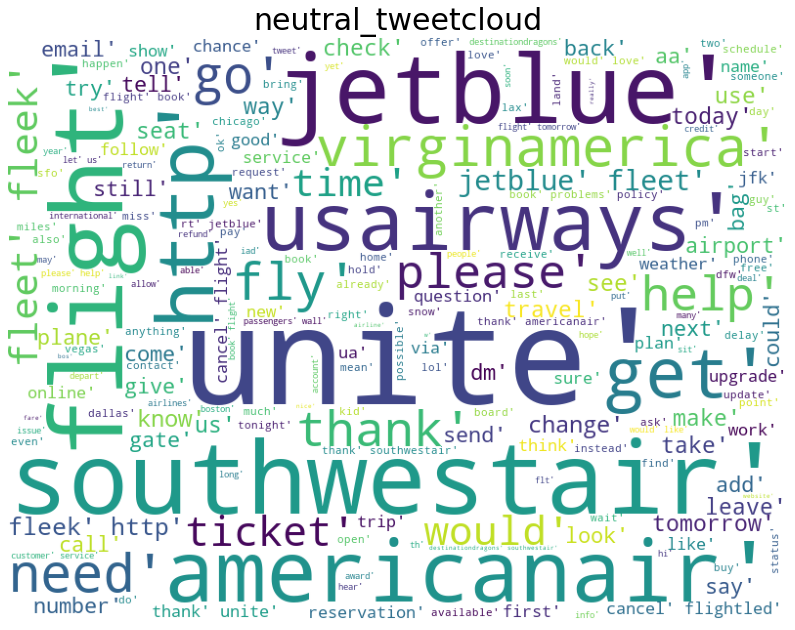

In [2556]:
import wordcloud
def show_wordcloud(neutral_sent, title):
    text = ' '.join(neutral_sent['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

show_wordcloud(neutral_sent, "neutral_tweetcloud")

# EDA :Observations and Analysis :

-	I have plot the word frequency of all the sentiments and we can see only for the negative sentiments ,
  We have more words frequency than positive and neutral.

-	Proportion of tweets for each hour of the day and we can see  that the most of the people are tweeting during the morning hours from 9A-3PM. We need to see the correlation with other features.

-	Also I have checked the Days of Feb month and it seems on the 22nd and 23rd Feb most of the portion of the tweets is being written. We need to see any correlation with these dates or any other factors.  

-	Also plot the pair plot  and don’t find nay specific correlation between numerical variables.
-	Count plot for the categorical variable we can see that the Most of the counts are negative tweet sentiments followed by neutral and positive.

-	Most of the Negative counts are for the Customer service and issues.

-	Also most of the twees are for the united airlines followed by US airways and southwest.

-	Boston MA is the location from where most of the tweets are tweeted seems these is issue for flits from this location and time zone is ET(US &canada).

-	Also for the numerical variables we have plot the bar plot  and we can see negative sentiment counts for the airline sentiments is high than other sentiments . re tweet counts is not showing any variation and .

-	I have also plotted the staked bar plot and seems united airlines has most of the negative sentiments, followed by US Airways and American airlines.

-	 Most of the positive tweets are for southwest airline and Delta air line and united airlines.

-	Also plot the word cloud  for each sentiment

-	Plot the top number of words in each sentiments to understand sentiments from text.

-	From over all analysis it seems that the people are not happy due to flight cancelation and delay mostly for United airline and USairline with customer service . 


# Vectorization :

 1) Using CountVectorizer.
 
 2) Use TfidfVectorizer.
 
 3) Apply count vectorizer
 
 4) Tf-IDF vectorizer, 
 
 5) on the required text column to make it suitable for fitting the model.


In [2557]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   text               14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


In [ ]:
data.airline_sentiment

In [ ]:
X = data_features

dic={1:"positive",0:"negative",2:"neutral"}
y = data.airline_sentiment.replace(dic)

In [ ]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [ ]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

In [ ]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['negative' , 'positive','neutral']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix

conf_mat = confusion_matrix(y_test, count_vectorizer_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'positive','neutral']],
                  columns = [i for i in ['negative', 'positive','neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [ ]:
all_features = Count_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud:Count Vector', fontsize=20)
plt.axis("off")
plt.show()

# Hyper paramter tunning the model :

In [ ]:
rnd_estimator_tuned = RandomForestClassifier(random_state=1)
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split#

parameters = {
        "n_estimators": [100,150,200,250],
     "max_samples": np.arange(0.3, 0.7, 0.1),
}

acc_scorer = metrics.make_scorer(metrics.recall_score, average='micro')

# Run the grid search
grid_obj = GridSearchCV(rnd_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)



# Fit the best algorithm to the data.
rnd_estimator_tuned.fit(X_train, y_train)

rnd_estimator_tuned= grid_obj.best_estimator_

print(rnd_estimator_tuned)


In [ ]:
# Training the best model and calculating accuracy on test data .
clf = rnd_estimator_tuned
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['negative' , 'positive','neutral']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix

conf_mat = confusion_matrix(y_test, count_vectorizer_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'positive','neutral']],
                  columns = [i for i in ['negative', 'positive','neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

# Observations :

- I have tried the  countvectorizer method to predict the sentiment analysis and i got 78.25%
  accuracy.

- Also ploted the classification report and confusion materix.

- I have tunned the model and used randomforest parmters but accuracy seems to be same so btter to use the previous model  as ranodm forest with tunned taking more time to learn.



# TDF-IDF Vectorization:


In [ ]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=500)
data_features = tfidf_vect.fit_transform(data['text'])

data_featurestfidf = data_features.toarray()

data_features.shape 

In [ ]:
X = data_featurestfidf

dic={1:"positive",0:"negative",2:"neutral"}
y = data.airline_sentiment.replace(dic)

In [ ]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [ ]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

In [ ]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
tf_idf_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['negative' , 'positive','neutral']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix

conf_mat = confusion_matrix(y_test, count_vectorizer_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'positive','neutral']],
                  columns = [i for i in ['negative', 'positive','neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

# HyperTunning TDF-IDF :

In [ ]:
rnd_estimator_tuned = RandomForestClassifier(random_state=1)
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split#

parameters = {
        "n_estimators": [100,150,200,250],
     "max_samples": np.arange(0.3, 0.7, 0.1),
}

acc_scorer = metrics.make_scorer(metrics.recall_score, average='micro')

# Run the grid search
grid_obj = GridSearchCV(rnd_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)



# Fit the best algorithm to the data.
rnd_estimator_tuned.fit(X_train, y_train)

rnd_estimator_tuned= grid_obj.best_estimator_
print( rnd_estimator_tuned)


In [ ]:
# Training the best model and calculating accuracy on test data .
clf = rnd_estimator_tuned
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
tf_idf_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['negative' , 'positive','neutral']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

In [ ]:
all_features = tfidf_vect.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud:TDF-IDF vector', fontsize=20)
plt.axis("off")
plt.show()

In [ ]:
#convert the test samples into a dataframe where the columns are
#the y_test(ground truth labels),tf-idf model predicted labels(tf_idf_predicted),Count Vectorizer model predicted labels(count_vectorizer_predicted)
df = pd.DataFrame(y_test.tolist(),columns =['y_test'])
df['count_vectorizer_predicted'] = count_vectorizer_predicted
df['tf_idf_predicted'] = tf_idf_predicted
df.tail()

In [ ]:
#create bar plot to compare the accuaracies of Count Vectorizer and TF-IDF
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
subjects = ['Count_Vectorizer', 'TF-IDF']

# calculation accuracies of Count Vectorizer and TF-IDF using accuracy_score metrics
scores = [accuracy_score(y_test,count_vectorizer_predicted),accuracy_score(y_test,tf_idf_predicted)]
ax.bar(subjects,scores)
ax.set_ylabel('scores',fontsize= 12)    # y axis label
ax.set_xlabel('models',fontsize= 12)    # x axis label
ax.set_title('Accuaracies of Supervised Learning Methods')  # tittle
for i, v in enumerate(scores):
    ax.text( i ,v+0.01, '{:.2f}%'.format(100*v), color='black', fontweight='bold')     
    plt.savefig('barplot_1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

# Observations  :

- We have use the vectorization  method both countvector and TDF and IDF and run the RandomForestClassifier .

-	Both vector have more than 75% accuracy and less recall 

-	TDF-IDF vector has better accuracy than the Count  vector model  

-	We have also plotted the  classification report and Confusion matrix for both vectorization menthod and TDF-IDF is better than  count vector. 

-  I have also Tune the model to by hyperparamters  for Randomforest to   improve the accuracy –  but it seems scoring models with optimal score perform similar with hyper tuned models.

- I have also plotted the difference between accuracy of both vectorization models.  

- Evaluate the model using the confusion matrix - Target the final score >= 75% both the vectorization matrix has accuracy of core more than 75%.

- also plotted the  top 40 features and plot their word cloud using both types of vectorization. 

- Tunned randomforest model is giving sam accuracy but we can try other models to get better accuracy 


 # Encoding text data.


1. **Sentiment Analysis** - Sentiment Analysis is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. The below can be used for Sentiment Analysis:
    *           **TextBlob**         
    *           **VADER Sentiment**

In [ ]:
import nltk
#download vader lexicon
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

sentiment = SentimentIntensityAnalyzer()

In [ ]:

data=data_new

In [ ]:
#Calculate the polarity score of the reviews
data_new['scores'] = data_new['text'].apply(lambda review: sentiment.polarity_scores(review))

data_new.head()

In [ ]:
#Calculate the compund score of the reviews
data_new['compound']  = data_new['scores'].apply(lambda score_dict: score_dict['compound'])

data_new.head()

In [ ]:
#Classify the class of the review by keeping threshold on the compund score
data_new['comp_score'] = data_new['compound']#.apply(lambda c: '1' if c >=0 else '0')

data_new.head()

In [ ]:
data["VADER_pred"] = data_new['comp_score'].tolist()
data.head()

In [ ]:
#Calculate the accuracy of the Vader Sentiment Analysis
dict={1:"positive",0:"negative",2:"neutral"}
data.airline_sentiment.replace(dict)
data['airline_sentiment']=data['airline_sentiment'].replace(['neutral'],2)
data['airline_sentiment']=data['airline_sentiment'].replace(['positive'],1)
data['airline_sentiment']=data['airline_sentiment'].replace(['negative'],0)

In [ ]:
data['airline_sentiment'].value_counts()

In [ ]:
#Calculate the accuracy of the Vader Sentiment Analysis
data["airline_sentiment"] = data["airline_sentiment"].astype(int)   #convert the sentiment column values into int data type
data["VADER_pred"] = data["VADER_pred"].astype(int) #convert the vader_predicted column values into int data type
print("Accuaracy using Vader Sentiment Analysis is : ",
      accuracy_score(data["airline_sentiment"].tolist(),data["VADER_pred"].tolist()))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix
conf_mat = confusion_matrix(data["airline_sentiment"].tolist(), data['VADER_pred'].tolist())

print(conf_mat)


print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'positive','neutral']],
                  columns = [i for i in ['negative', 'positive','neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

# TEXTBLOB Method : 

In [ ]:
from textblob import TextBlob

In [ ]:
data_new = data.copy() 

In [ ]:
#Calculate the polarity score of the reviews
data_new['polarity']  = data_new['text'].apply(lambda text: TextBlob(text).sentiment.polarity)

data_new.head()

In [ ]:
#Classify the class of the review by keeping threshold on the polarity score
data_new['polarity_score'] = data_new['polarity'].apply(lambda c: '1' if c >=0 else '0')

data_new.head()

In [ ]:
data["Text_Blob_pred"] = data_new['polarity_score'].tolist()
data.head()

In [ ]:
#Calculate the accuracy of the Vader Sentiment Analysis
data["airline_sentiment"] = data["airline_sentiment"].astype(int)  #convert the sentiment column values into int data type
data["Text_Blob_pred"] = data["Text_Blob_pred"].astype(int)  #convert the textblob predicted column values into int data type
print("Accuaracy of using Text Blob Sentiment Analysis is : ",
      accuracy_score(data["airline_sentiment"].tolist(),data["Text_Blob_pred"].tolist()))

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(data["airline_sentiment"].tolist(), data['Text_Blob_pred'].tolist())

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'positive','neutral']],
                  columns = [i for i in ['negative', 'positive','neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [ ]:
#plot the accuaracies of the text blob and Vader
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
subjects = ['Vader', 'Text Blob']
# calculation accuracies of Vader and Textblob models using accuracy_score metrics
scores = [accuracy_score(data["airline_sentiment"].tolist(),data["VADER_pred"].tolist()),accuracy_score(data["airline_sentiment"].tolist(),data["Text_Blob_pred"].tolist())]
ax.bar(subjects,scores)
ax.set_ylabel('scores',fontsize= 12)   # y-axis labels
ax.set_xlabel('models',fontsize= 12)   # x-axis labels
ax.set_title('Accuaracies of UnSupervised Learning Methods')   #tittle of the graph
for i, v in enumerate(scores):
    ax.text( i ,v+0.01, '{:.2f}%'.format(100*v), color='black', fontweight='bold')
    plt.savefig('barplot_1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

# Observations : 

- I have also tired the other mode for the sentiment analysis 
- **TextBlob**   and
- **VADER Sentiment**

- Accuracy for both model VADER and TextBlob is less than the Vectorizer and random forest .
- Acurracy is less than <75% for both models and VADER has 63% acuracy better than TEXtBLOB.



# Conclusion and Recommndations :

- We have use the vectorization  method both countvector and TDF and IDF and run the RandomForestClassifier .

- Both vector have more than 75% accuracy and less recall.

- TDF-IDF vector has better accuracy than the Count  vector model   .

- Evaluate the model using the confusion matrix - Target the final score >= 75% both the vectorization matrix has accuracy of core more than 75%.

- We can use the TF-IDF model to predict the sentiment form the tweets created by the peoples.

- Airlines such as united airlines followed by US airways and southwest.  are most  tweeted   and have mostly negative sentiments for the duration .
- Also most for the tweets are taking about the services and flight cancelation or delay as per word cloud and other veotrizatio methods.

- Proportion of tweets for each hour of the day and we can see  that the most of the people are tweeting during the morning hours from 9A-3PM. 

- Top negative sentiment airways should check what happened  before this time  and undertand cause of time frame.

-	Also I have checked the Days of Feb month and it seems on the 22nd and 23rd Feb most of the portion of the tweets is being written. We need to see any correlation with these dates or any other factors.  

-	Most of the Negative counts are for the Customer service and issues.

-	Boston MA is the location from where most of the tweets are tweeted seems these is issue for flits from this location and time zone is ET(US &canada).

-	we can see negative sentiment counts for the airline sentiments is high than other sentiments . re tweet counts is not showing any variation .

-	united airlines has most of the negative sentiments, followed by US Airways and American airlines.

-	 Most of the positive tweets are for southwest airline and Delta air line and united airlines.

- From over all analysis it seems that the people are not happy due to flight cancelation and delay mostly for United airline and USairline with customer service .

- Also most for the tweets are taking about the services and flight cancelation or delay as per word cloud and other veotrizatio methods.

- Higher Negtive sentiment flights should  work on their customer service and improve the time punctuality for flights also see the flights of location Bostson MA why it has so many tweets and peoples tweets on 22nd and 23rd Feb 2015 so much .

